In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORTING DATASET**

In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index) # made date as the index

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,0.0,0.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,0.0,0.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,0.0,0.0


**plotting**

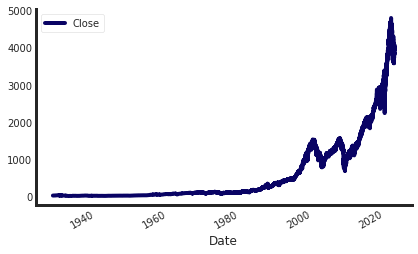

In [ ]:
sp500.plot.line(y="Close", use_index=True)

**editing the dataset**

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
ds_lstm = sp500[:]
ds_lstm

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0


**IMPROVING THE DATASET**

In [ ]:
horizons = [2,5,60,250,1000] #2,5.. are the number of days before the present day
new_predictors = []

for horizon in horizons:
    rolling_averages = ds_lstm.rolling(horizon).mean() # giving us the mean of last 'horizon' days
    
    ratio_column = f"Close_Ratio_{horizon}"
    ds_lstm[ratio_column] = ds_lstm["Close"] / rolling_averages["Close"] # ratio of present close and last horizon close
    
    trend_column = f"Trend_{horizon}"
    ds_lstm[trend_column] = ds_lstm.shift(1).rolling(horizon).sum()["Target"] # ----
    
    new_predictors+= [ratio_column, trend_column]

<ipython-input-36-05b7b250bb7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_lstm[ratio_column] = ds_lstm["Close"] / rolling_averages["Close"] # ratio of present close and last horizon close
<ipython-input-36-05b7b250bb7e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_lstm[trend_column] = ds_lstm.shift(1).rolling(horizon).sum()["Target"] # ----


In [ ]:
ds_lstm = ds_lstm.dropna(subset=ds_lstm.columns[ds_lstm.columns != "Tomorrow"])

In [ ]:
ds_lstm

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1,0.995476,0.0,0.974851,1.0,0.994816,23.0,0.925362,108.0,1.053661,542.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1,1.000518,1.0,0.985832,1.0,0.995128,24.0,0.927108,108.0,1.054372,542.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0,1.007379,2.0,1.006559,2.0,1.008911,25.0,0.941667,108.0,1.069626,543.0


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
datasetForLSTM = ds_lstm.loc[:].copy()
datasetForLSTM

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1,0.995476,0.0,0.974851,1.0,0.994816,23.0,0.925362,108.0,1.053661,542.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1,1.000518,1.0,0.985832,1.0,0.995128,24.0,0.927108,108.0,1.054372,542.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0,1.007379,2.0,1.006559,2.0,1.008911,25.0,0.941667,108.0,1.069626,543.0


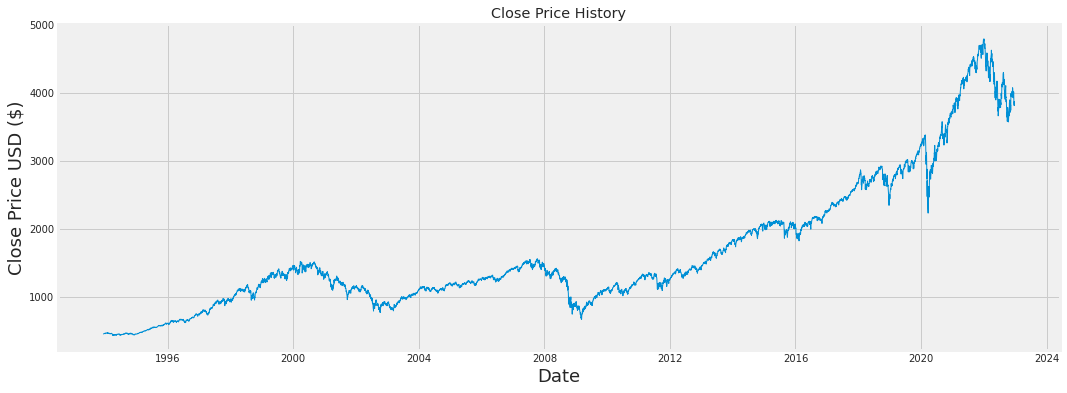

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(datasetForLSTM['Close'], linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = datasetForLSTM.filter(['Close'])
#data = datasetForLSTM
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

#training_data_len
data

,Close
Date,
1993-12-14 00:00:00-05:00,463.059998
1993-12-15 00:00:00-05:00,461.839996
1993-12-16 00:00:00-05:00,463.339996
1993-12-17 00:00:00-05:00,466.380005
1993-12-20 00:00:00-05:00,465.850006
...,...
2022-12-19 00:00:00-05:00,3817.659912
2022-12-20 00:00:00-05:00,3821.620117
2022-12-21 00:00:00-05:00,3878.439941


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
#scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00553969],
       [0.00525972],
       [0.00560395],
       ...,
       [0.78930795],
       [0.77644547],
       [0.78159279]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00553969, 0.00525972, 0.00560395, 0.00630157, 0.00617995,
       0.00605373, 0.00651729, 0.00653106, 0.00725622, 0.00734801,
       0.00726539, 0.00682021, 0.00631764, 0.00608586, 0.00641861,
       0.00657006, 0.00647139, 0.00710935, 0.00834167, 0.00808006,
       0.00808924, 0.00769912, 0.00825906, 0.00788959, 0.0081076 ,
       0.00811907, 0.00827512, 0.00821545, 0.00758438, 0.00734342,
       0.00786664, 0.00875014, 0.00912879, 0.00979658, 0.00933991,
       0.00988608, 0.00959005, 0.0070887 , 0.00753619, 0.00737325,
       0.00776796, 0.00688675, 0.0071736 , 0.00718508, 0.00771059,
       0.00777255, 0.00721032, 0.00660219, 0.00746734, 0.00729064,
       0.00581507, 0.00623044, 0.00647598, 0.00585638, 0.00594129,
       0.00552822, 0.00592522, 0.0064232 , 0.00618683, 0.00645762])]
[0.005732456148244872]

[array([0.00553969, 0.00525972, 0.00560395, 0.00630157, 0.00617995,
       0.00605373, 0.00651729, 0.00653106, 0.00725622, 0.00734801,
       0.00726539, 0.00682021, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
##model.fit(x_train, y_train, batch_size=1, epochs=1)
model.fit(x_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
216/216 [==============================] - 49s 187ms/step - loss: 0.0013
Epoch 2/3
216/216 [==============================] - 28s 127ms/step - loss: 8.7295e-05
Epoch 3/3
216/216 [==============================] - 29s 133ms/step - loss: 8.6816e-05


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12/12 [==============================] - 2s 45ms/step


127.89694490009573

<ipython-input-47-d712e79fde40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


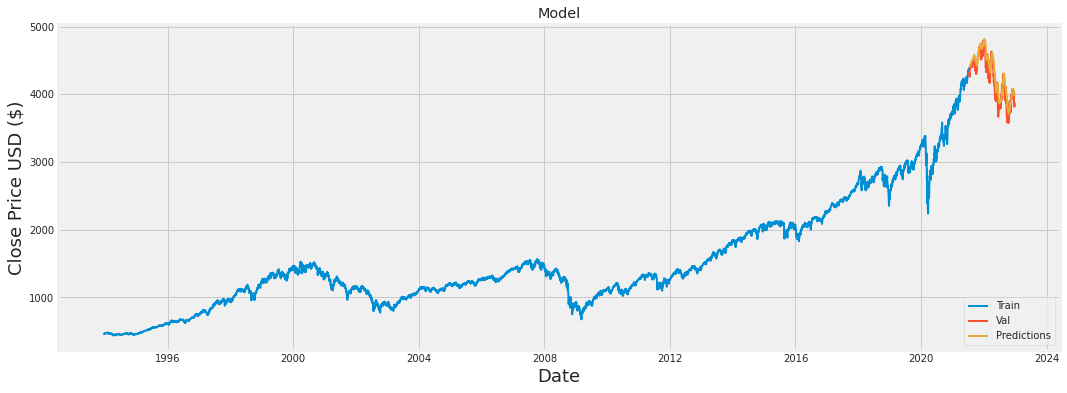

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'],linewidth=2)
plt.plot(valid[['Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-07-16 00:00:00-04:00,4327.160156,4417.216309
2021-07-19 00:00:00-04:00,4258.490234,4419.800781
2021-07-20 00:00:00-04:00,4323.060059,4415.776367
2021-07-21 00:00:00-04:00,4358.689941,4411.606934
2021-07-22 00:00:00-04:00,4367.479980,4409.532715
...,...,...
2022-12-19 00:00:00-05:00,3817.659912,4037.066895
2022-12-20 00:00:00-05:00,3821.620117,4020.434326
2022-12-21 00:00:00-05:00,3878.439941,4001.682373


**ANOTHER LSTM APPRAOCH**

In [ ]:
#https://github.com/flo7up/relataly-public-python-tutorials/blob/master/007%20Time%20Series%20Forecasting%20-%20Multivariate%20Time%20Series%20Models.ipynb

import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns # Visualization
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

ds_lstm

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1,0.995476,0.0,0.974851,1.0,0.994816,23.0,0.925362,108.0,1.053661,542.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1,1.000518,1.0,0.985832,1.0,0.995128,24.0,0.927108,108.0,1.054372,542.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0,1.007379,2.0,1.006559,2.0,1.008911,25.0,0.941667,108.0,1.069626,543.0


In [ ]:
# Indexing Batches
train_df = ds_lstm.sort_values(by=['Date']).copy()

# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close', 'Tomorrow'
            , 'Close_Ratio_5',	'Trend_5'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Close', 'Tomorrow', 'Close_Ratio_5', 'Trend_5']


,High,Low,Open,Close,Tomorrow,Close_Ratio_5,Trend_5,Prediction
Date,,,,,,,,
2022-12-19 00:00:00-05:00,3854.860107,3800.040039,3853.790039,3817.659912,3821.620117,0.974851,1.0,3817.659912
2022-12-20 00:00:00-05:00,3838.239990,3795.620117,3810.469971,3821.620117,3878.439941,0.985832,1.0,3821.620117
2022-12-21 00:00:00-05:00,3889.820068,3839.489990,3839.489990,3878.439941,3822.389893,1.006559,2.0,3878.439941
2022-12-22 00:00:00-05:00,3853.260010,3764.489990,3853.260010,3822.389893,3844.820068,0.995805,2.0,3822.389893
2022-12-23 00:00:00-05:00,3845.800049,3797.010010,3815.110107,3844.820068,NaN,1.002042,3.0,3844.820068


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(7311, 7)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(5799, 50, 7) (5799,)
(1462, 50, 7) (1462,)
0.005815073313822833
0.005815073313822833


In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
# Training the model
epochs = 5 #5
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])


Epoch 1/5
363/363 [==============================] - 210s 576ms/step - loss: 2.4881e-05 - val_loss: 5.6120e-04
Epoch 2/5
363/363 [==============================] - 198s 546ms/step - loss: 2.4024e-05 - val_loss: 1.9273e-04
Epoch 3/5
363/363 [==============================] - 195s 537ms/step - loss: 2.1155e-05 - val_loss: 2.8526e-04
Epoch 4/5
363/363 [==============================] - 193s 531ms/step - loss: 2.3056e-05 - val_loss: 3.6005e-04
Epoch 5/5
363/363 [==============================] - 194s 533ms/step - loss: 2.0804e-05 - val_loss: 1.2246e-04


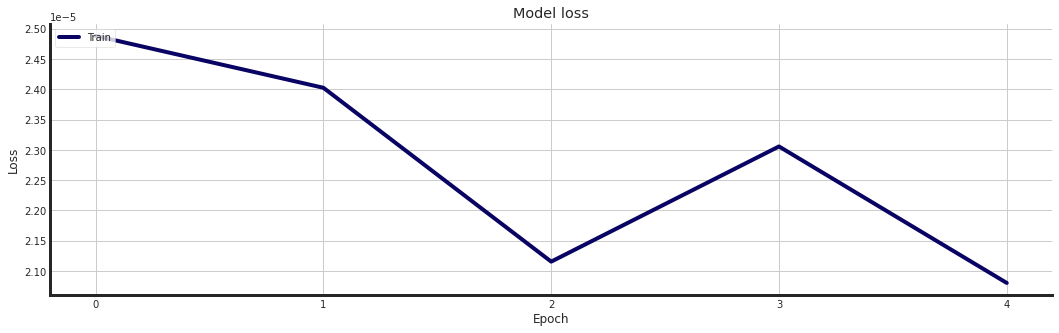

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

print(y_pred.size)

# ROOT Mean SquarE Error (RMSE)
RMSE = np.sqrt(np.mean(((y_pred - y_test_unscaled) ** 2)))
print(f'RMSE: {np.round(RMSE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

46/46 [==============================] - 11s 229ms/step
1462
RMSE: 48.22
Mean Absolute Percentage Error (MAPE): 1.01 %


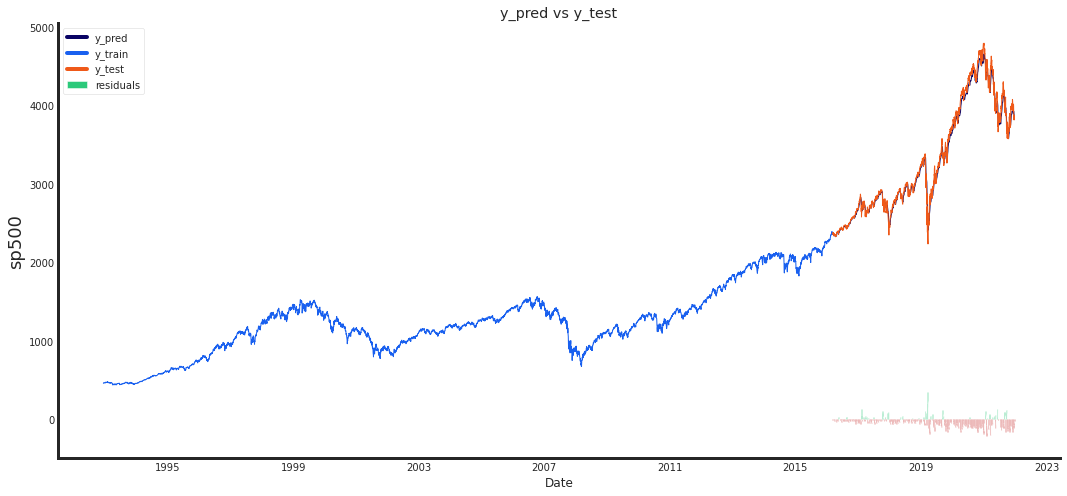

In [ ]:
# The date from which on the date is displayed
display_start_date = "1990" 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel("sp500", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

In [ ]:
print(y_pred_scaled.ravel())
print(y_test_unscaled.ravel())

[0.44267324 0.44115904 0.4408677  ... 0.779392   0.77829564 0.77655077]
[2362.97998047 2364.87011719 2372.60009766 ... 3878.43994141 3822.38989258
 3844.82006836]
